# Retail Analysis
## Dataset Description:
#### Instances: 3.73 Lakh
#### Features: 6 columns
#### Numerical: 4 columns
#### Categorical: 2 columns

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import gc
import datetime
import warnings
warnings.filterwarnings("ignore")


# Attribute Information:

#### Order ID: Order identification number for each product
#### Product: Product name
#### Quantity Ordered: Amount of items
#### Price Each: Price of each product per item in dollars
#### Order Date: Date of purchase
#### Purchase Address: Address of purchase order

In [2]:

data=pd.read_excel("C:/Users/Chinmay/Downloads/all_data_copy.xlsx")

data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
373695,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001"
373696,259354,iPhone,1,700,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016"
373697,259355,iPhone,1,700,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016"
373698,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016"


# Rename variables

In [7]:
data.rename(index=str, columns={'Quantity Ordered': 'Quantity_Ordered',
                              'Price Each' : 'Price_Each',
                              'Order Date' : 'Order_Date',
                              'Purchase Address' : 'Purchase_Address'}, inplace=True)

# Summary of each columns

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 373700 entries, 0 to 373699
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          372610 non-null  object
 1   Product           372610 non-null  object
 2   Quantity_Ordered  372610 non-null  object
 3   Price_Each        372610 non-null  object
 4   Order_Date        372610 non-null  object
 5   Purchase_Address  372610 non-null  object
dtypes: object(6)
memory usage: 20.0+ MB


In [9]:
data.describe()

,Order ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
count,372610,372610,372610,372610.00,372610,372610
unique,178438,20,10,18.00,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,710,43806,337104,43806.00,710,710


### As we can see here all columns datatype are in categorical form which is not suitable for our further analysis, so we have to change datatype of each variable accoring its preference by doing basic exploration .


| variables | types |
|:---------|----------:|
| Order ID | Nominal |
| Product | Nominal |
| Quantity Ordered| Discrete |
| Price Each |Continous |
| Order Date | date and time |
| Purchase Address | Nominal |


# Cleaning data for further analysis

In [10]:
#Finding unique values in dataset 
data.nunique()

Order ID            178438
Product                 20
Quantity_Ordered        10
Price_Each              18
Order_Date          142396
Purchase_Address    140788
dtype: int64

In [11]:
# Dropping duplicate datas
data1=data.drop_duplicates()

In [12]:
#Identify null values in dataset
df1= data1.isnull()
df1

,Order ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
186845,False,False,False,False,False,False
186846,False,False,False,False,False,False
186847,False,False,False,False,False,False
186848,False,False,False,False,False,False


In [13]:
df1.sum()

Order ID            1
Product             1
Quantity_Ordered    1
Price_Each          1
Order_Date          1
Purchase_Address    1
dtype: int64

### There is only one null value in each column which will need to be removed

In [14]:
# Finding zero values in dataset
print((data=='0').any().sum())
print((data=='0').sum())

0
Order ID            0
Product             0
Quantity_Ordered    0
Price_Each          0
Order_Date          0
Purchase_Address    0
dtype: int64


In [15]:
# Drop null values 
data2=data1.dropna()
data2

,Order ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,141234,iPhone,1,700,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016"
186846,319667,AA Batteries (4-pack),2,3.84,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001"
186847,319668,Vareebadd Phone,1,400,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101"
186848,319669,Wired Headphones,1,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001"


In [16]:
# Findout wrong values in dataset
print(data2["Product"].unique())
print(data2["Quantity_Ordered"].unique())
print(data2["Price_Each"].unique())

['iPhone' 'Lightning Charging Cable' 'Wired Headphones' '27in FHD Monitor'
 'AAA Batteries (4-pack)' '27in 4K Gaming Monitor' 'USB-C Charging Cable'
 'Bose SoundSport Headphones' 'Apple Airpods Headphones'
 'Macbook Pro Laptop' 'Flatscreen TV' 'Vareebadd Phone'
 'AA Batteries (4-pack)' 'Google Phone' '20in Monitor'
 '34in Ultrawide Monitor' 'ThinkPad Laptop' 'LG Dryer'
 'LG Washing Machine' 'Product']
[1 2 3 5 4 7 'Quantity Ordered' 6 9 8]
[700 14.95 11.99 149.99 2.99 389.99 11.95 99.99 150 1700 300 400 3.84 600
 109.99 379.99 999.99 'Price Each']


### As we can see here there is some inappropriate values in each variable which needs to be removed

In [17]:
data2.nunique()

Order ID            178438
Product                 20
Quantity_Ordered        10
Price_Each              18
Order_Date          142396
Purchase_Address    140788
dtype: int64

In [18]:
#Removing wrong values
data2=data2[-(data2[data2.columns[1:-1]] =='Quantity_Ordered').any(axis=1)]
data2=data2[-(data2[data2.columns[1:-1]] =='Order ID').any(axis=1)]
data2=data2[-(data2[data2.columns[1:-1]] =='Product').any(axis=1)]
data2=data2[-(data2[data2.columns[1:-1]] =='Order_Date').any(axis=1)]
data2=data2[-(data2[data2.columns[1:-1]] =='Price_Each').any(axis=1)]
data2=data2[-(data2[data2.columns[1:-1]] =='Purchase_Address').any(axis=1)]
data2.head(10)

,Order ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,141234,iPhone,1,700,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301"
5,141239,AAA Batteries (4-pack),1,2.99,2019-01-29 20:22:00,"775 Willow St, San Francisco, CA 94016"
6,141240,27in 4K Gaming Monitor,1,389.99,2019-01-26 12:16:00,"979 Park St, Los Angeles, CA 90001"
7,141241,USB-C Charging Cable,1,11.95,2019-01-05 12:04:00,"181 6th St, San Francisco, CA 94016"
8,141242,Bose SoundSport Headphones,1,99.99,2019-01-01 10:30:00,"867 Willow St, Los Angeles, CA 90001"
9,141243,Apple Airpods Headphones,1,150,2019-01-22 21:20:00,"657 Johnson St, San Francisco, CA 94016"


In [19]:
# Checking wrong values are removed or not
print(data2["Product"].unique())
print(data2["Quantity_Ordered"].unique())
print(data2["Price_Each"].unique())

['iPhone' 'Lightning Charging Cable' 'Wired Headphones' '27in FHD Monitor'
 'AAA Batteries (4-pack)' '27in 4K Gaming Monitor' 'USB-C Charging Cable'
 'Bose SoundSport Headphones' 'Apple Airpods Headphones'
 'Macbook Pro Laptop' 'Flatscreen TV' 'Vareebadd Phone'
 'AA Batteries (4-pack)' 'Google Phone' '20in Monitor'
 '34in Ultrawide Monitor' 'ThinkPad Laptop' 'LG Dryer'
 'LG Washing Machine']
[1 2 3 5 4 7 6 9 8]
[700 14.95 11.99 149.99 2.99 389.99 11.95 99.99 150 1700 300 400 3.84 600
 109.99 379.99 999.99]


### Succesfully removed wrong datas from variables

# Correction of datatypes

In [20]:
#checking datatypes
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185686 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185686 non-null  object
 1   Product           185686 non-null  object
 2   Quantity_Ordered  185686 non-null  object
 3   Price_Each        185686 non-null  object
 4   Order_Date        185686 non-null  object
 5   Purchase_Address  185686 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


In [33]:
# chenging datatypes
data2['Order_Date']= pd.to_datetime(data2['Order_Date'])
data2['Quantity_Ordered']= pd.to_numeric(data2['Quantity_Ordered'])
data2['Price_Each']= pd.to_numeric(data2['Price_Each'])


### Converting "order date" column object to DateTimeIndex
### Converting "Quantity_Ordered" column object to Numeric
### Converting "Price Each" column object to Numeric

In [34]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185686 entries, 0 to 186849
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185686 non-null  object        
 1   Product           185686 non-null  object        
 2   Quantity_Ordered  185686 non-null  int64         
 3   Price_Each        185686 non-null  float64       
 4   Order_Date        185686 non-null  datetime64[ns]
 5   Purchase_Address  185686 non-null  object        
 6   day_of_week       185686 non-null  object        
 7   Sales             185686 non-null  float64       
 8   date              185686 non-null  int64         
 9   Month             185686 non-null  int64         
 10  year              185686 non-null  int64         
 11  hour              185686 non-null  int64         
 12  month             185686 non-null  object        
 13  session           185686 non-null  category      
dtypes: catego

## We can extract date ,time ,week day, month ,year from "Order date" variable 

In [35]:
# Binning week day using order_date data
data2['day_of_week'] = data2['Order_Date'].dt.day_name()

In [36]:
#add sales variable for further analysis
data2['Sales'] = data2['Quantity_Ordered'] * data2['Price_Each']

In [37]:
#Extracting date,month,year,hour variable from Order_Date column
data2['date']=pd.DatetimeIndex(data2['Order_Date']).day
data2['Month']=pd.DatetimeIndex(data2['Order_Date']).month
data2['year']=pd.DatetimeIndex(data2['Order_Date']).year
data2['hour']=data2['Order_Date'].dt.hour
data2.head()

,Order ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,day_of_week,Sales,date,Month,year,hour,month,session
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",Tuesday,700.00,22,1,2019,21,jan,Night
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",Monday,14.95,28,1,2019,14,jan,Noon
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",Thursday,23.98,17,1,2019,13,jan,Noon
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",Saturday,149.99,5,1,2019,20,jan,Evening
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",Friday,11.99,25,1,2019,11,jan,Morning


In [38]:
#create dummy variables according month
data2['month']= data2.Month.map({1:'jan',2:'feb',3:'march',4:'april',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [39]:
# Binning every session of a day according hour variable
prods = pd.DataFrame({'hour':range(1, 25)})

b = [0,4,8,12,16,20,24]
l = ['Late Night', 'Early Morning','Morning','Noon','Evening','Night']
data2['session'] = pd.cut(data2['hour'], bins=b, labels=l, include_lowest=True)

In [40]:
# now drop some unnecessary colums
data3=data2.drop(['Month'],axis=1)
data3=data3.drop(['hour'],axis=1)
data3.head(20)

,Order ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,day_of_week,Sales,date,year,month,session
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",Tuesday,700.00,22,2019,jan,Night
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",Monday,14.95,28,2019,jan,Noon
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",Thursday,23.98,17,2019,jan,Noon
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",Saturday,149.99,5,2019,jan,Evening
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",Friday,11.99,25,2019,jan,Morning
5,141239,AAA Batteries (4-pack),1,2.99,2019-01-29 20:22:00,"775 Willow St, San Francisco, CA 94016",Tuesday,2.99,29,2019,jan,Evening
6,141240,27in 4K Gaming Monitor,1,389.99,2019-01-26 12:16:00,"979 Park St, Los Angeles, CA 90001",Saturday,389.99,26,2019,jan,Morning
7,141241,USB-C Charging Cable,1,11.95,2019-01-05 12:04:00,"181 6th St, San Francisco, CA 94016",Saturday,11.95,5,2019,jan,Morning
8,141242,Bose SoundSport Headphones,1,99.99,2019-01-01 10:30:00,"867 Willow St, Los Angeles, CA 90001",Tuesday,99.99,1,2019,jan,Morning
9,141243,Apple Airpods Headphones,1,150.00,2019-01-22 21:20:00,"657 Johnson St, San Francisco, CA 94016",Tuesday,150.00,22,2019,jan,Night


In [46]:
#Extracting city column from Purchess_Adress data
data3['City'] = data3['Purchase_Address']
def adding_city_and_state(a):
    return f"{a.split(',')[1][1:]}"

In [47]:
#Categorize all cities
data3['City'] = data3['City'].apply(adding_city_and_state)
data3['City'].head()

0           Boston
1         Portland
2    San Francisco
3      Los Angeles
4           Austin
Name: City, dtype: object

In [48]:
data3.head()

,Order ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,day_of_week,Sales,date,year,month,session,City
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",Tuesday,700.00,22,2019,jan,Night,Boston
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",Monday,14.95,28,2019,jan,Noon,Portland
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",Thursday,23.98,17,2019,jan,Noon,San Francisco
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",Saturday,149.99,5,2019,jan,Evening,Los Angeles
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",Friday,11.99,25,2019,jan,Morning,Austin


In [49]:
# converting date and year column numeric to categorical
data3.date = data3.date.astype(str)
data3.year = data3.year.astype(str)

In [50]:
#Checking null values in cleand dataset
data2.isnull().sum().sort_values(ascending=False)

Order ID            0
Product             0
Quantity_Ordered    0
Price_Each          0
Order_Date          0
Purchase_Address    0
day_of_week         0
Sales               0
date                0
Month               0
year                0
hour                0
month               0
session             0
dtype: int64

In [51]:
#checking any zero value
print((data2==0).any().sum())
print((data2==0).sum())

1
Order ID               0
Product                0
Quantity_Ordered       0
Price_Each             0
Order_Date             0
Purchase_Address       0
day_of_week            0
Sales                  0
date                   0
Month                  0
year                   0
hour                3902
month                  0
session                0
dtype: int64


## Finally we get fully cleaned dataset

In [52]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185686 entries, 0 to 186849
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185686 non-null  object        
 1   Product           185686 non-null  object        
 2   Quantity_Ordered  185686 non-null  int64         
 3   Price_Each        185686 non-null  float64       
 4   Order_Date        185686 non-null  datetime64[ns]
 5   Purchase_Address  185686 non-null  object        
 6   day_of_week       185686 non-null  object        
 7   Sales             185686 non-null  float64       
 8   date              185686 non-null  object        
 9   year              185686 non-null  object        
 10  month             185686 non-null  object        
 11  session           185686 non-null  category      
 12  City              185686 non-null  object        
dtypes: category(1), datetime64[ns](1), float64(2), int64(1), object(

# Summary :

### From previous(uncleaned) dataset we obtained 6 colums and 3.73lakh rows and all columns are in categorical type which is basically uncleaned data.
### We got some duplicated value, missing values,wrong  values,zero values from this dataset and fix all these using EDA.
### Extract and add diffrent variables using given variables which is going to help us in our further analysis like Sale,session,city,date, month,year, hour.
### Drop some unnessary columns which is not going to help us in our further analysis .

# Which City had the highest sales overall

In [53]:
results = data3.groupby('City').sum()
results[results['Sales'] == results['Sales'].max()]

,Quantity_Ordered,Price_Each,Sales
City,,,
San Francisco,50169,8.204001e+06,8.254744e+06


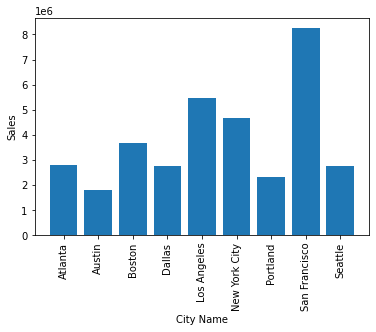

In [54]:
cities = [city for city, _ in data3.groupby('City')]

plt.bar(cities, results['Sales'])
plt.xticks(cities, rotation='vertical')
plt.ylabel('Sales')
plt.xlabel('City Name')
plt.show()

## As we can see here San Francisco had the highest sales overall

# Which Month had the highest amount of sales overall

In [55]:
print(data3["month"].unique())

['jan' 'feb' 'march' 'april' 'may' 'june' 'july' 'aug' 'sep' 'oct' 'nov'
 'dec']


In [56]:
#grouping month column
results2 = data3.groupby(['month','City']).sum()
results2.head(20)

Quantity_Ordered  Price_Each      Sales
month City                                                  
april Atlanta                    1632   282843.98  284422.01
      Austin                     1092   171487.65  172683.59
      Boston                     2186   351254.76  353392.17
      Dallas                     1516   250084.11  251235.54
      Los Angeles                3393   546672.24  550080.29
      New York City              2741   445119.78  449314.88
      Portland                   1397   238942.93  239978.12
      San Francisco              4972   805654.68  812387.30
      Seattle                    1607   274158.63  275724.08
aug   Atlanta                    1053   168443.29  169267.66
      Austin                      734   124996.01  125563.62
      Boston                     1407   236917.69  239260.31
      Dallas                     1101   178858.30  179663.47
      Los Angeles                2071   342575.71  344163.58
      New York City              1806   300370.95  302401.53
      Portland                    925   151713.18  152712.79
      San Francisco              3186   535002.71  538715.31
      Seattle                    1146   188086.06  189335.10
dec   Atlanta                    2223   358692.12  360494.32
      Austin                     1515   231978.13  233315.10

In [57]:
#checking highest sales month
results3 = data3.groupby(['month']).sum()
results3[results3['Sales'] == results3['Sales'].max()]

,Quantity_Ordered,Price_Each,Sales
month,,,
dec,28074,4.583268e+06,4.608296e+06


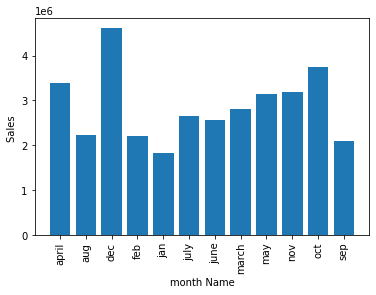

In [58]:
# analysing sales per month using count plot
Months = [month for month, _ in data3.groupby('month')]

plt.bar(Months, results3['Sales'])
plt.xticks(Months, rotation='vertical')
plt.ylabel('Sales ')
plt.xlabel('month Name')
plt.show()

## As we can see here december had the highest sales amount overall

# Finding most bought products per city

In [59]:
#find out most bought products per city
group = data3.groupby(['City','Product']).sum()
dd = group['Quantity_Ordered'].groupby(level=0, group_keys=False)
dd.nlargest(5)

#CITY         #PRODUCT                   #QANTITY ORDERD

City           Product                 
Atlanta        AAA Batteries (4-pack)      2358
               AA Batteries (4-pack)       2193
               USB-C Charging Cable        1912
               Lightning Charging Cable    1874
               Wired Headphones            1576
Austin         AAA Batteries (4-pack)      1668
               AA Batteries (4-pack)       1422
               Lightning Charging Cable    1305
               USB-C Charging Cable        1249
               Wired Headphones            1127
Boston         AAA Batteries (4-pack)      3458
               AA Batteries (4-pack)       3011
               USB-C Charging Cable        2555
               Lightning Charging Cable    2482
               Wired Headphones            2222
Dallas         AAA Batteries (4-pack)      2500
               AA Batteries (4-pack)       2260
               Lightning Charging Cable    1862
               USB-C Charging Cable        1849
               Wired Headphones            1664


# most bought products per city
| City | Product | Quantity Orderd |
|:---------|----------:|-----------:|
| Atlanta | AAA Batteries (4-pack)| 2358 |
| Austin | AAA Batteries (4-pack) | 1668 |
| Boston | AAA Batteries (4-pack) | 3458 |
| Dallas | AAA Batteries (4-pack) | 2500 |
| Los Angeles | AAA Batteries (4-pack) | 4958 |
| New York City | AAA Batteries (4-pack) | 4119 |
| Portland | AAA Batteries (4-pack) | 2078 |
| San Francisco | AAA Batteries (4-pack) | 7404 |
| Seattle | AAA Batteries (4-pack) | 2443 |

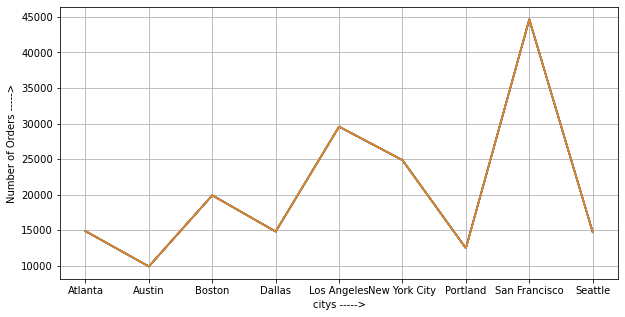

In [60]:
# Total order quqntity per city
hours = [city for city, _ in data3.groupby('City')]
plt.figure(figsize=(10,5))
plt.plot(hours, data3.groupby(['City']).count())
plt.xticks(hours)
plt.xlabel("citys ----->")
plt.ylabel("Number of Orders ----->")
plt.grid()
plt.show()

## As we can see that top most amount of order comes from "San Francico" thats why i suggest this city for establishing a new branch for the retail store 

# Find out the distribution of sales over different times of the day (Morning, Afternoon, Evening, Night) of each city .

In [61]:
# distribution of product and sales over different times of the day
group = data3.groupby(['City','session','Product']).sum()
total_price = group['Quantity_Ordered'].groupby(level=0, group_keys=False)
total_price.nlargest(5)

City           session  Product               
Atlanta        Evening  AAA Batteries (4-pack)     592
               Morning  AAA Batteries (4-pack)     575
               Evening  AA Batteries (4-pack)      569
               Morning  AA Batteries (4-pack)      547
               Noon     AAA Batteries (4-pack)     533
Austin         Morning  AAA Batteries (4-pack)     456
               Noon     AAA Batteries (4-pack)     430
               Evening  AAA Batteries (4-pack)     384
                        AA Batteries (4-pack)      350
               Morning  AA Batteries (4-pack)      339
Boston         Evening  AAA Batteries (4-pack)     985
               Morning  AAA Batteries (4-pack)     829
               Evening  AA Batteries (4-pack)      782
               Noon     AA Batteries (4-pack)      778
                        AAA Batteries (4-pack)     766
Dallas         Morning  AAA Batteries (4-pack)     624
               Noon     AAA Batteries (4-pack)     601
               Eve

# products are mostly sold at different times of the day

| Diffrent time of day | Product | Quantity Orderd |
|:---------|----------:|-----------:|
|Late Night | AAA Batteries (4-pack) | 1575
|Early Morning | AAA Batteries (4-pack) | 2372
|Morning | AAA Batteries (4-pack) | 7497
|Noon | AAA Batteries (4-pack) | 7120
|Evening | AAA Batteries (4-pack) | 8159
|Night | AAA Batteries (4-pack) | 4263


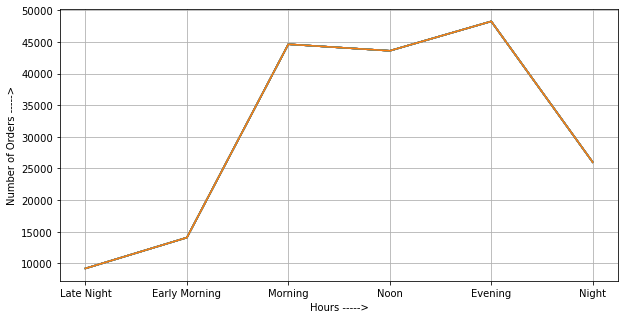

In [40]:
# findout most selling time of the day 
hours = [Session for Session, _ in data3.groupby('session')]
plt.figure(figsize=(10,5))
plt.plot(hours, data3.groupby(['session']).count())
plt.xticks(hours)
plt.xlabel("Hours ----->")
plt.ylabel("Number of Orders ----->")
plt.grid()
plt.show()

# best working hours and the best products for the retail stores in each city.

In [42]:
group2 = data3.groupby(['City','session','Product']).sum()
analysis=group2.sort_values(by='Quantity_Ordered', ascending=False)
analysis.head(20)

Quantity_Ordered  Price_Each  \
City          session Product                                                  
San Francisco Evening AAA Batteries (4-pack)                2034     4018.56   
              Morning AAA Batteries (4-pack)                1725     3459.43   
              Noon    AAA Batteries (4-pack)                1681     3372.72   
              Evening AA Batteries (4-pack)                 1663     4823.04   
              Morning AA Batteries (4-pack)                 1582     4396.80   
              Noon    AA Batteries (4-pack)                 1568     4492.80   
              Evening USB-C Charging Cable                  1511    16550.75   
                      Lightning Charging Cable              1433    19898.45   
              Morning USB-C Charging Cable                  1417    15319.90   
              Noon    USB-C Charging Cable                  1388    15045.05   
              Morning Lightning Charging Cable              1367    19121.05   
              Noon    Lightning Charging Cable              1290    17880.20   
Los Angeles   Evening AAA Batteries (4-pack)                1260     2520.57   
San Francisco Evening Wired Headphones                      1260    14196.16   
Los Angeles   Morning AAA Batteries (4-pack)                1257     2508.61   
San Francisco Noon    Wired Headphones                      1202    13165.02   
              Morning Wired Headphones                      1174    13069.10   
Los Angeles   Evening AA Batteries (4-pack)                 1166     3256.32   
New York City Evening AAA Batteries (4-pack)                1131     2251.47   
Los Angeles   Noon    AAA Batteries (4-pack)                1116     2224.56   

                                                   Sales  
City          session Product                             
San Francisco Evening AAA Batteries (4-pack)     6081.66  
              Morning AAA Batteries (4-pack)     5157.75  
              Noon    AAA Batteries (4-pack)     5026.19  
              Evening AA Batteries (4-pack)      6385.92  
              Morning AA Batteries (4-pack)      6074.88  
              Noon    AA Batteries (4-pack)      6021.12  
              Evening USB-C Charging Cable      18056.45  
                      Lightning Charging Cable  21423.35  
              Morning USB-C Charging Cable      16933.15  
              Noon    USB-C Charging Cable      16586.60  
              Morning Lightning Charging Cable  20436.65  
              Noon    Lightning Charging Cable  19285.50  
Los Angeles   Evening AAA Batteries (4-pack)     3767.40  
San Francisco Evening Wired Headphones          15107.40  
Los Angeles   Morning AAA Batteries (4-pack)     3758.43  
San Francisco Noon    Wired Headphones          14411.98  
              Morning Wired Headphones          14076.26  
Los Angeles   Evening AA Batteries (4-pack)      4477.44  
New York City Evening AAA Batteries (4-pack)     3381.69  
Los Angeles   Noon    AAA Batteries (4-pack)     3336.84

# AAA Batteries(4-pack) is most selling product

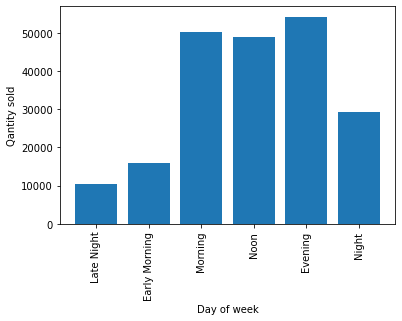

In [108]:
cities = [session for session, _ in data3.groupby('session')]

plt.bar(cities, results6['Quantity_Ordered'])
plt.xticks(cities, rotation='vertical')
plt.ylabel('Qantity sold')
plt.xlabel('Day of week')
plt.show();

## As per analysis evening time is best working hour becuse most of the products are ordered at the time of evening

# Find out the pair of products that are most sold together

In [109]:
data4 = data3[data3['Order ID'].duplicated(keep=False)]
data4.head(10)

,Order ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,day_of_week,Sales,date,year,month,session,City
41,141275,USB-C Charging Cable,1,11.95,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",Monday,11.95,7,2019,jan,Noon,Austin
42,141275,Wired Headphones,1,11.99,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",Monday,11.99,7,2019,jan,Noon,Austin
57,141290,Apple Airpods Headphones,1,150.00,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",Wednesday,150.00,2,2019,jan,Early Morning,Los Angeles
58,141290,AA Batteries (4-pack),3,3.84,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",Wednesday,11.52,2,2019,jan,Early Morning,Los Angeles
133,141365,Vareebadd Phone,1,400.00,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001",Thursday,400.00,10,2019,jan,Morning,New York City
134,141365,Wired Headphones,1,11.99,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001",Thursday,11.99,10,2019,jan,Morning,New York City
153,141384,Google Phone,1,600.00,2019-01-03 00:14:00,"223 Jackson St, Boston, MA 02215",Thursday,600.00,3,2019,jan,Late Night,Boston
154,141384,USB-C Charging Cable,1,11.95,2019-01-03 00:14:00,"223 Jackson St, Boston, MA 02215",Thursday,11.95,3,2019,jan,Late Night,Boston
220,141450,Google Phone,1,600.00,2019-01-12 11:16:00,"521 Park St, San Francisco, CA 94016",Saturday,600.00,12,2019,jan,Morning,San Francisco
221,141450,Bose SoundSport Headphones,1,99.99,2019-01-12 11:16:00,"521 Park St, San Francisco, CA 94016",Saturday,99.99,12,2019,jan,Morning,San Francisco


In [110]:
# adding Grouped column which will tell us what products are sold with the same Order Id
data4['Grouped'] = data4.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
data4.head()

,Order ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,day_of_week,Sales,date,year,month,session,City,Grouped
41,141275,USB-C Charging Cable,1,11.95,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",Monday,11.95,7,2019,jan,Noon,Austin,"USB-C Charging Cable,Wired Headphones"
42,141275,Wired Headphones,1,11.99,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",Monday,11.99,7,2019,jan,Noon,Austin,"USB-C Charging Cable,Wired Headphones"
57,141290,Apple Airpods Headphones,1,150.00,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",Wednesday,150.00,2,2019,jan,Early Morning,Los Angeles,"Apple Airpods Headphones,AA Batteries (4-pack)"
58,141290,AA Batteries (4-pack),3,3.84,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",Wednesday,11.52,2,2019,jan,Early Morning,Los Angeles,"Apple Airpods Headphones,AA Batteries (4-pack)"
133,141365,Vareebadd Phone,1,400.00,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001",Thursday,400.00,10,2019,jan,Morning,New York City,"Vareebadd Phone,Wired Headphones"


In [111]:
# Removing the duplicates from the dataset
data4 = data4[['Order ID', 'Grouped']].drop_duplicates()
data4.head()

,Order ID,Grouped
41,141275,"USB-C Charging Cable,Wired Headphones"
57,141290,"Apple Airpods Headphones,AA Batteries (4-pack)"
133,141365,"Vareebadd Phone,Wired Headphones"
153,141384,"Google Phone,USB-C Charging Cable"
220,141450,"Google Phone,Bose SoundSport Headphones"


'iPhone', 'Lightning Charging Cable' : 1002
'Google Phone', 'USB-C Charging Cable' : 985
'iPhone', 'Wired Headphones' : 447
'Google Phone', 'Wired Headphones' : 413
'Vareebadd Phone', 'USB-C Charging Cable' : 361
'iPhone', 'Apple Airpods Headphones' : 360
'Google Phone', 'Bose SoundSport Headphones' : 220
'USB-C Charging Cable', 'Wired Headphones' : 159
'Vareebadd Phone', 'Wired Headphones' : 143
'Lightning Charging Cable', 'Wired Headphones' : 92


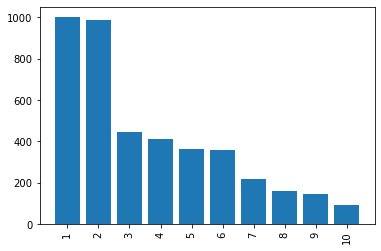

In [112]:
# Counting the frequency of occurence of two products together

from itertools import combinations
from collections import Counter

count = Counter()

for row in data4['Grouped']:
    row_list = list(row.split(','))
    count.update(Counter(combinations(row_list, 2)))
items = []
items_count = []
for key, value in count.most_common(10):
    items.append(str(key))
    items_count.append(int(value))
    print(f"{str(key)[1:-1]} : {str(value)}")

item_len = range(1, len(items)+1)
plt.bar(item_len, items_count)
plt.xticks(item_len, rotation='vertical')
plt.show()
    

# In most selling product pair mostly all are mobile phones or eloctronics which are sold with it's charging accessories .